<h2 align=\"center\">Sales Prediction Analysis</h2>

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

## Step 1: Import modules

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Step 2:  Loading the dataset

In [119]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [120]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

##  Step 3: Preprocessing the dataset

In [121]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [122]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [123]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [124]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

In [125]:
# fill the missing values
item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [126]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [127]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [128]:
df['Item_Weight'].isnull().sum()

0

In [129]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [130]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [131]:
df['Outlet_Size'].isnull().sum()

0

In [132]:
sum(df['Item_Visibility']==0)

526

In [133]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [134]:
sum(df['Item_Visibility']==0)

0

In [135]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

##  Step 4: Creation of New Attributes

In [136]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [137]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [138]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [139]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [140]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [141]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


##  Step 5: Exploratory Data Analysis

<Axes: xlabel='Item_Weight', ylabel='Density'>

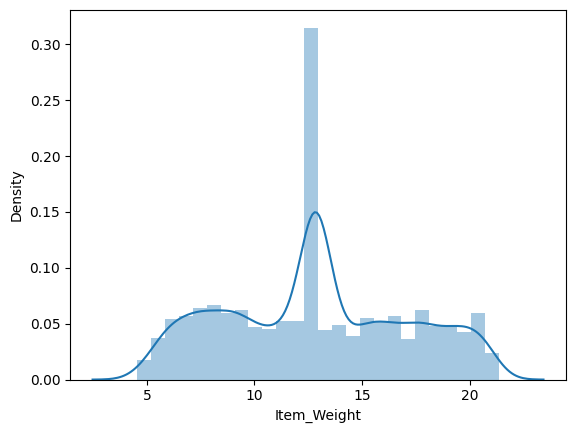

In [142]:
sns.distplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

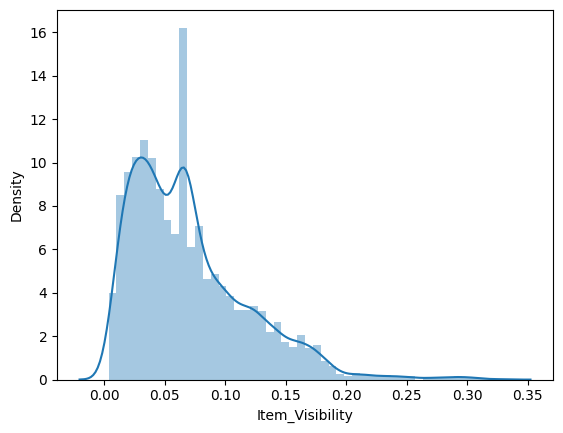

In [143]:
sns.distplot(df['Item_Visibility'])

<Axes: xlabel='Item_MRP', ylabel='Density'>

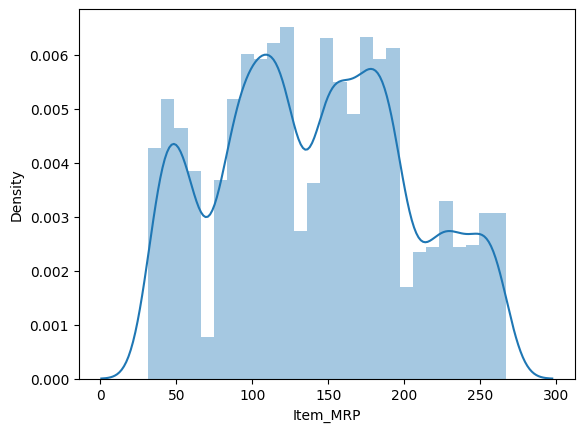

In [144]:
sns.distplot(df['Item_MRP'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

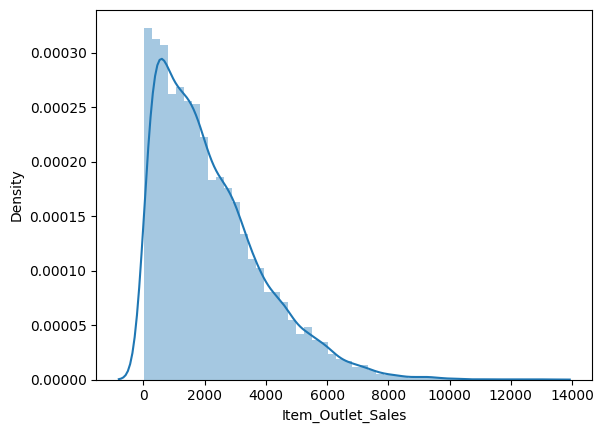

In [145]:
sns.distplot(df['Item_Outlet_Sales'])

In [146]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

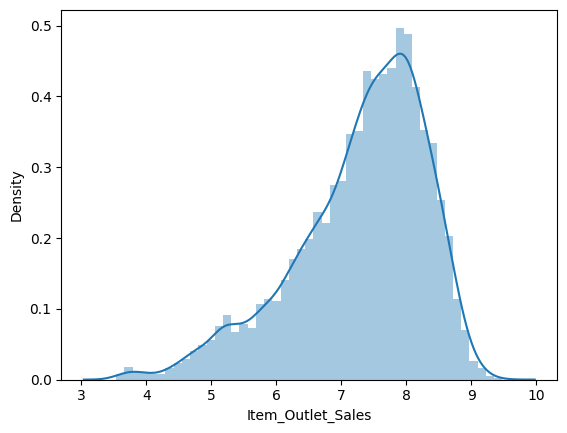

In [147]:
sns.distplot(df['Item_Outlet_Sales'])

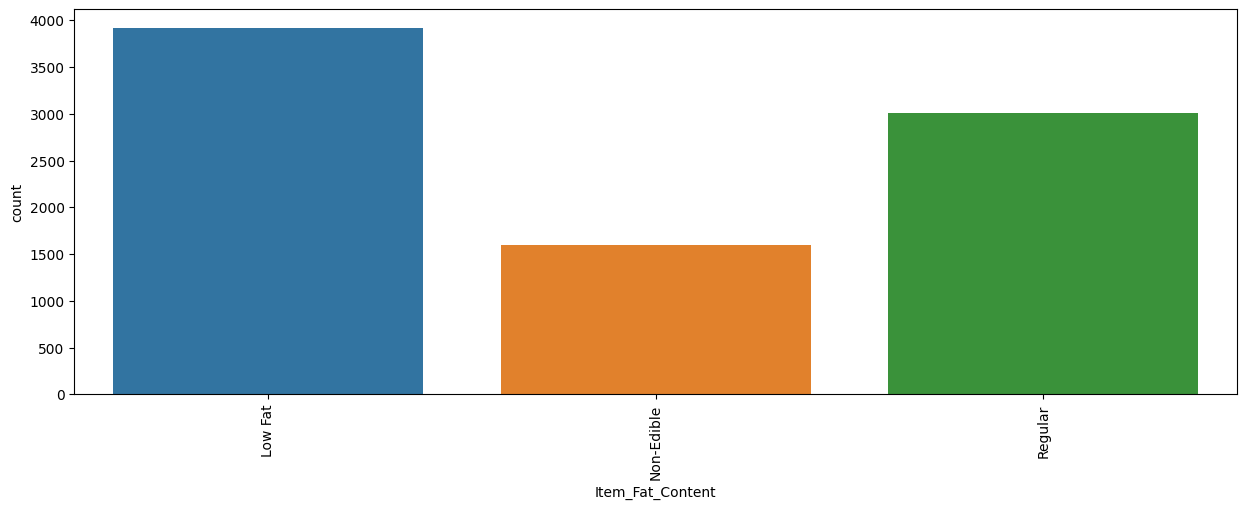

In [151]:
og_ifc = df['Item_Fat_Content'].dtype
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype('category')

plt.figure(figsize=(15, 5))
chart = sns.countplot(data=df, x="Item_Fat_Content")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype(og_ifc)

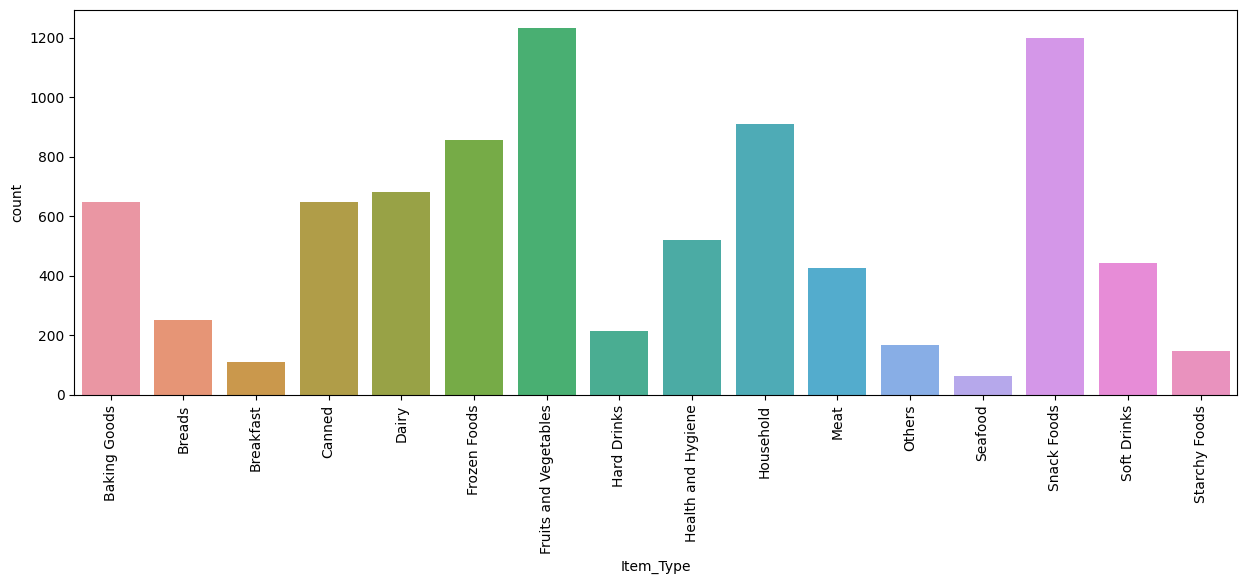

In [152]:

og_it = df['Item_Type'].dtype
df['Item_Type'] = df['Item_Type'].astype('category')

plt.figure(figsize=(15, 5))
chart = sns.countplot(data=df, x="Item_Type")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()
df['Item_Type'] = df['Item_Type'].astype(og_it)


<Axes: ylabel='count'>

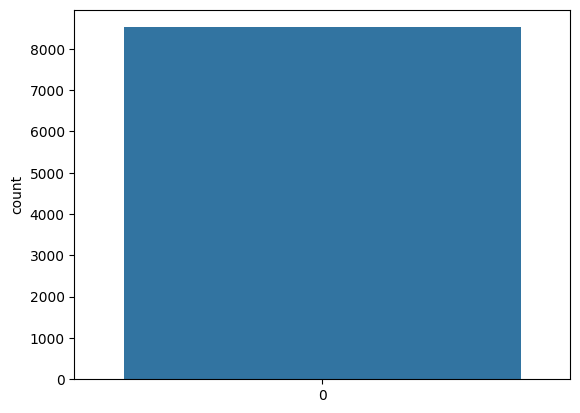

In [153]:
sns.countplot(df['Outlet_Establishment_Year'])

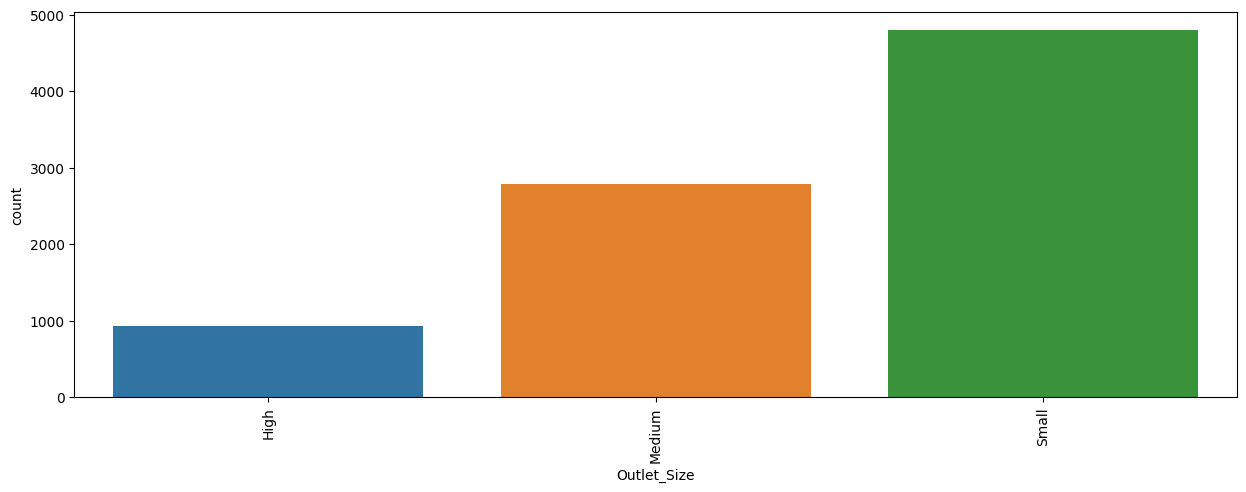

In [158]:
og_os = df['Outlet_Size'].dtype
df['Outlet_Size'] = df['Outlet_Size'].astype('category')

plt.figure(figsize=(15, 5))
chart = sns.countplot(data=df, x="Outlet_Size")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()
df['Outlet_Size'] = df['Outlet_Size'].astype(og_os)


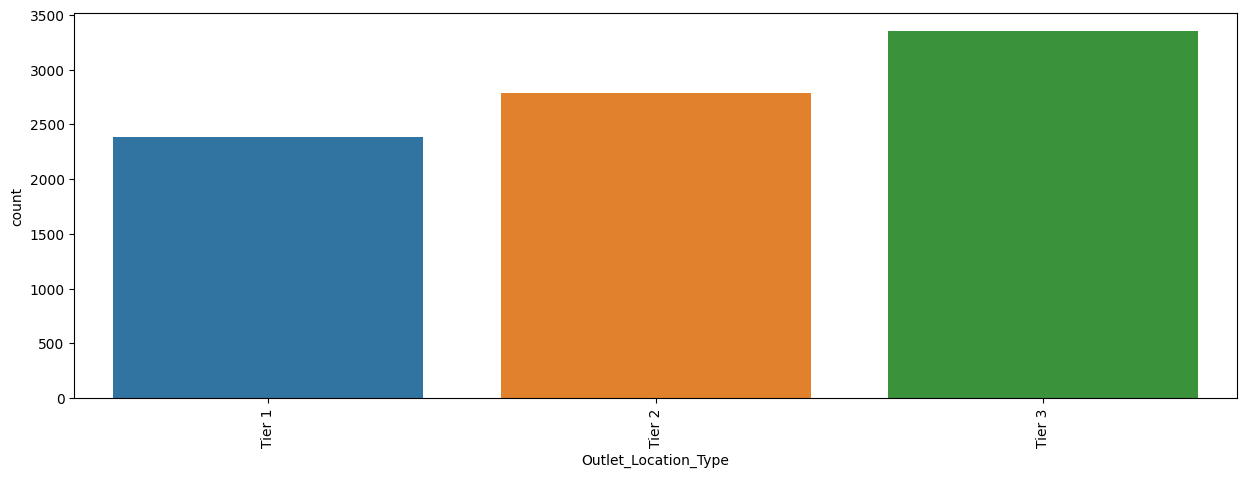

In [157]:
og_olt = df['Outlet_Location_Type'].dtype
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('category')

plt.figure(figsize=(15, 5))
chart = sns.countplot(data=df, x="Outlet_Location_Type")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype(og_olt)


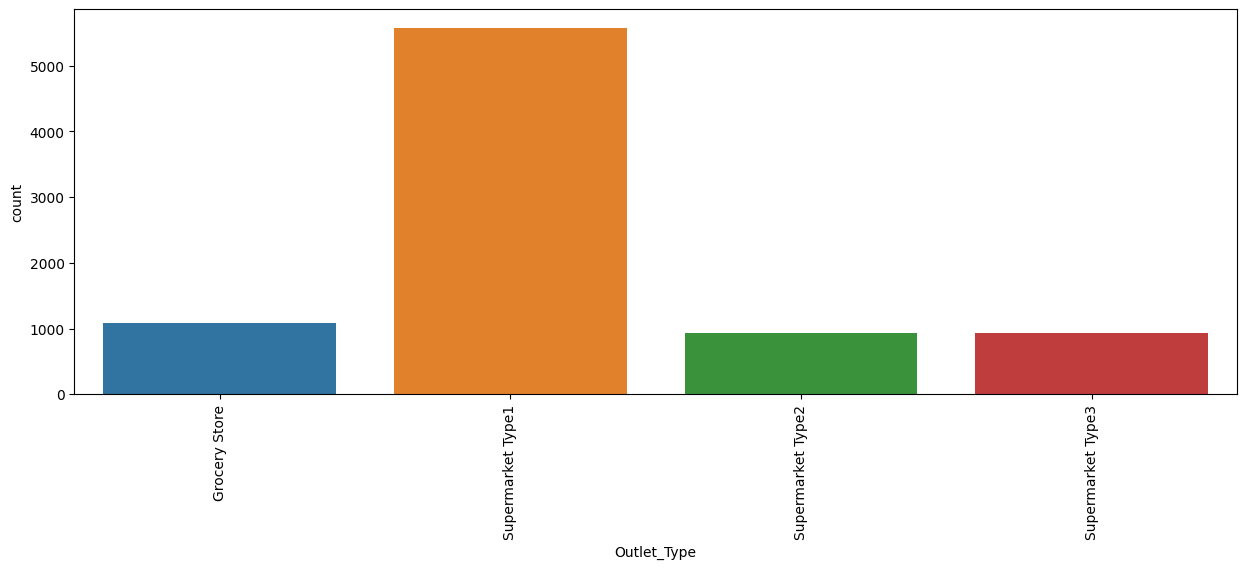

In [161]:

og_ot = df['Outlet_Type'].dtype
df['Outlet_Type'] = df['Outlet_Type'].astype('category')

plt.figure(figsize=(15, 5))
chart = sns.countplot(data=df, x="Outlet_Type")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()
df['Outlet_Type'] = df['Outlet_Type'].astype(og_ot)


##  Step 6: Coorelation Matrix



<Axes: >

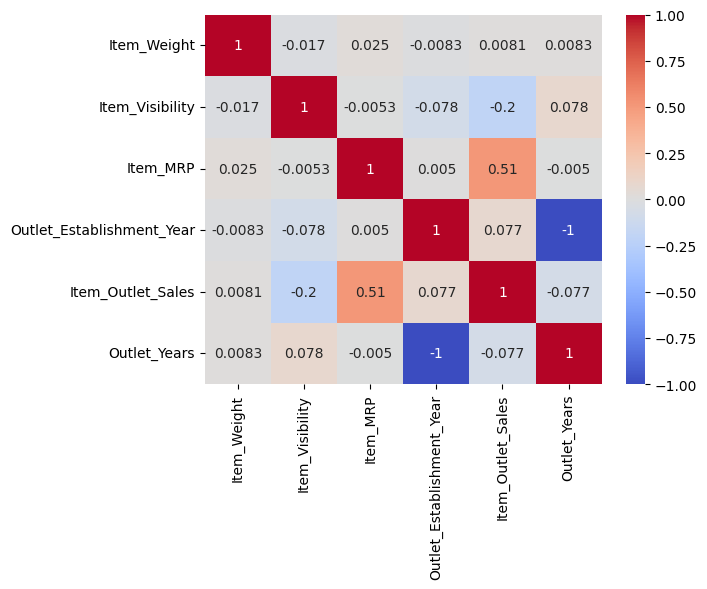

In [163]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [164]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


## Label Encoding

In [165]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

## Onehot Encoding

In [166]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,False,False,True,False,True,False,False,False,False,True


## Input Split

In [167]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

##  Step 7: Model Training

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.28800650325017957
CV Score: 0.2891182742641595


<Axes: title={'center': 'Model Coefficients'}>

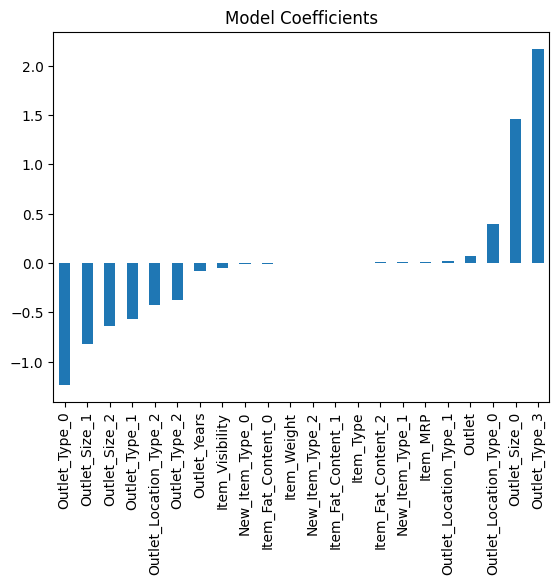

In [174]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.2880361826180549
CV Score: 0.2891442869461051


<Axes: title={'center': 'Model Coefficients'}>

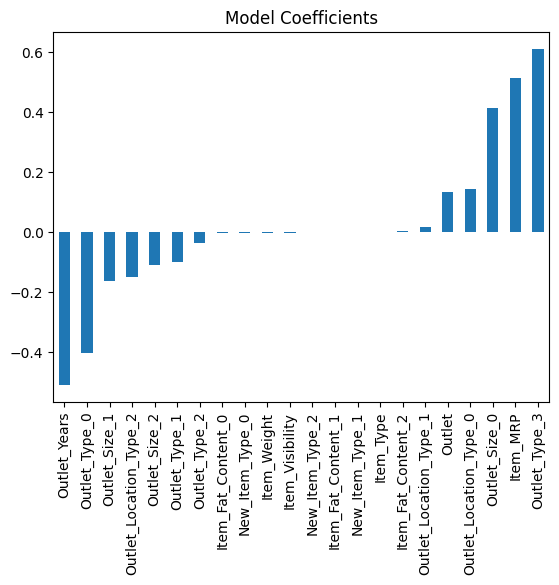

In [176]:
model = Ridge()
train(model, X_scaled, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.7628688679102087
CV Score: 0.7630789166281843


<Axes: title={'center': 'Model Coefficients'}>

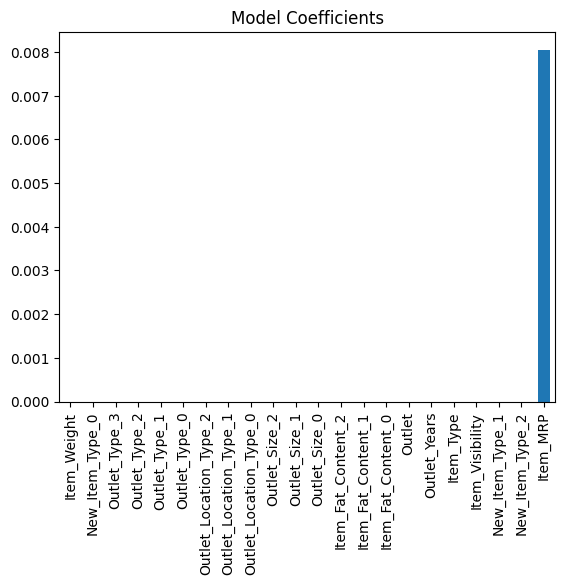

In [177]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 2.7767015319289398e-34
CV Score: 0.5749826129464559


<Axes: title={'center': 'Feature Importance'}>

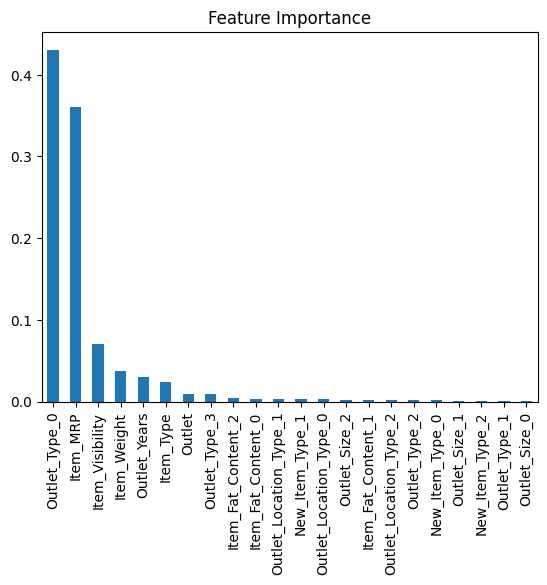

In [178]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.042510117494117865
CV Score: 0.31126847862669427


<Axes: title={'center': 'Feature Importance'}>

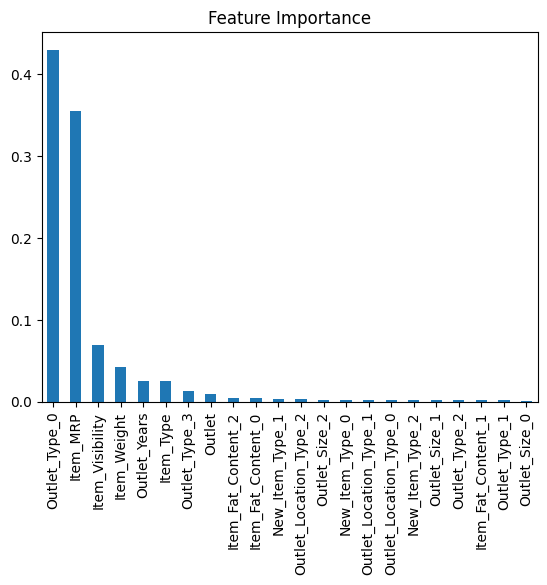

In [179]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.33114170758856076


<Axes: title={'center': 'Feature Importance'}>

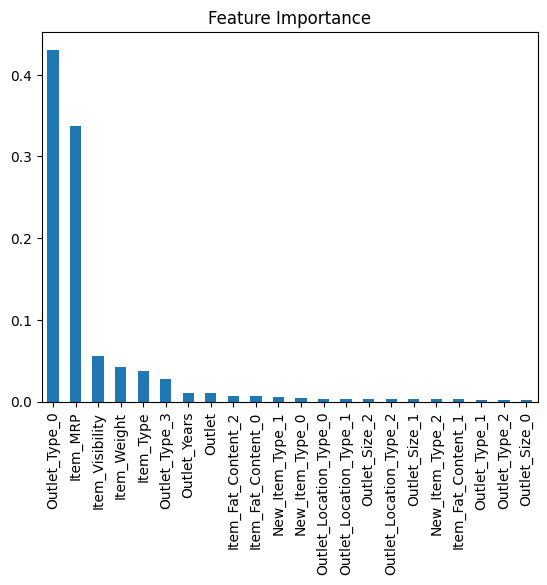

In [180]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")